<a id='top'> </a>
Author: [James Bourbeau](http://www.jamesbourbeau.com)

In [1]:
%load_ext watermark
%watermark -u -d -v -p numpy,matplotlib,scipy,pandas,sklearn,mlxtend

last updated: 2017-04-20 

CPython 2.7.10
IPython 5.3.0

numpy 1.12.1
matplotlib 2.0.0
scipy 0.19.0
pandas 0.19.2
sklearn 0.18.1
mlxtend 0.5.1


In [2]:
%matplotlib notebook
from __future__ import division, print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn.apionly as sns

import composition as comp
import composition.analysis.plotting as plotting
    
color_dict = comp.analysis.get_color_dict()

/home/jbourbeau/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df_sim = comp.load_dataframe(datatype='sim')

sim quality cut event flow:
             IceTopQualityCuts:    1.0    1.0
         lap_InIce_containment:  0.776  0.776
              InIceQualityCuts:  0.786   0.75
                 num_hits_1_60:  0.999   0.75
             reco_energy_range:  0.837  0.623
                 IceTop_charge:  0.896  0.562




/home/jbourbeau/cr-composition/composition/dataframe_functions.py:145: RuntimeWarning: divide by zero encountered in log10
  df['log_IceTop_charge_175m'] = np.log10(df['IceTop_charge_175m'])


In [4]:
light_mask = df_sim['MC_comp_class'] == 'light'
heavy_mask = df_sim['MC_comp_class'] == 'heavy'
null_mask = ~df_sim['IceTop_charge_175m'].isnull()

In [5]:
null_mask.sum()/len(null_mask)

1.0

In [6]:
df_sim = df_sim[null_mask]

<IPython.core.display.Javascript object>


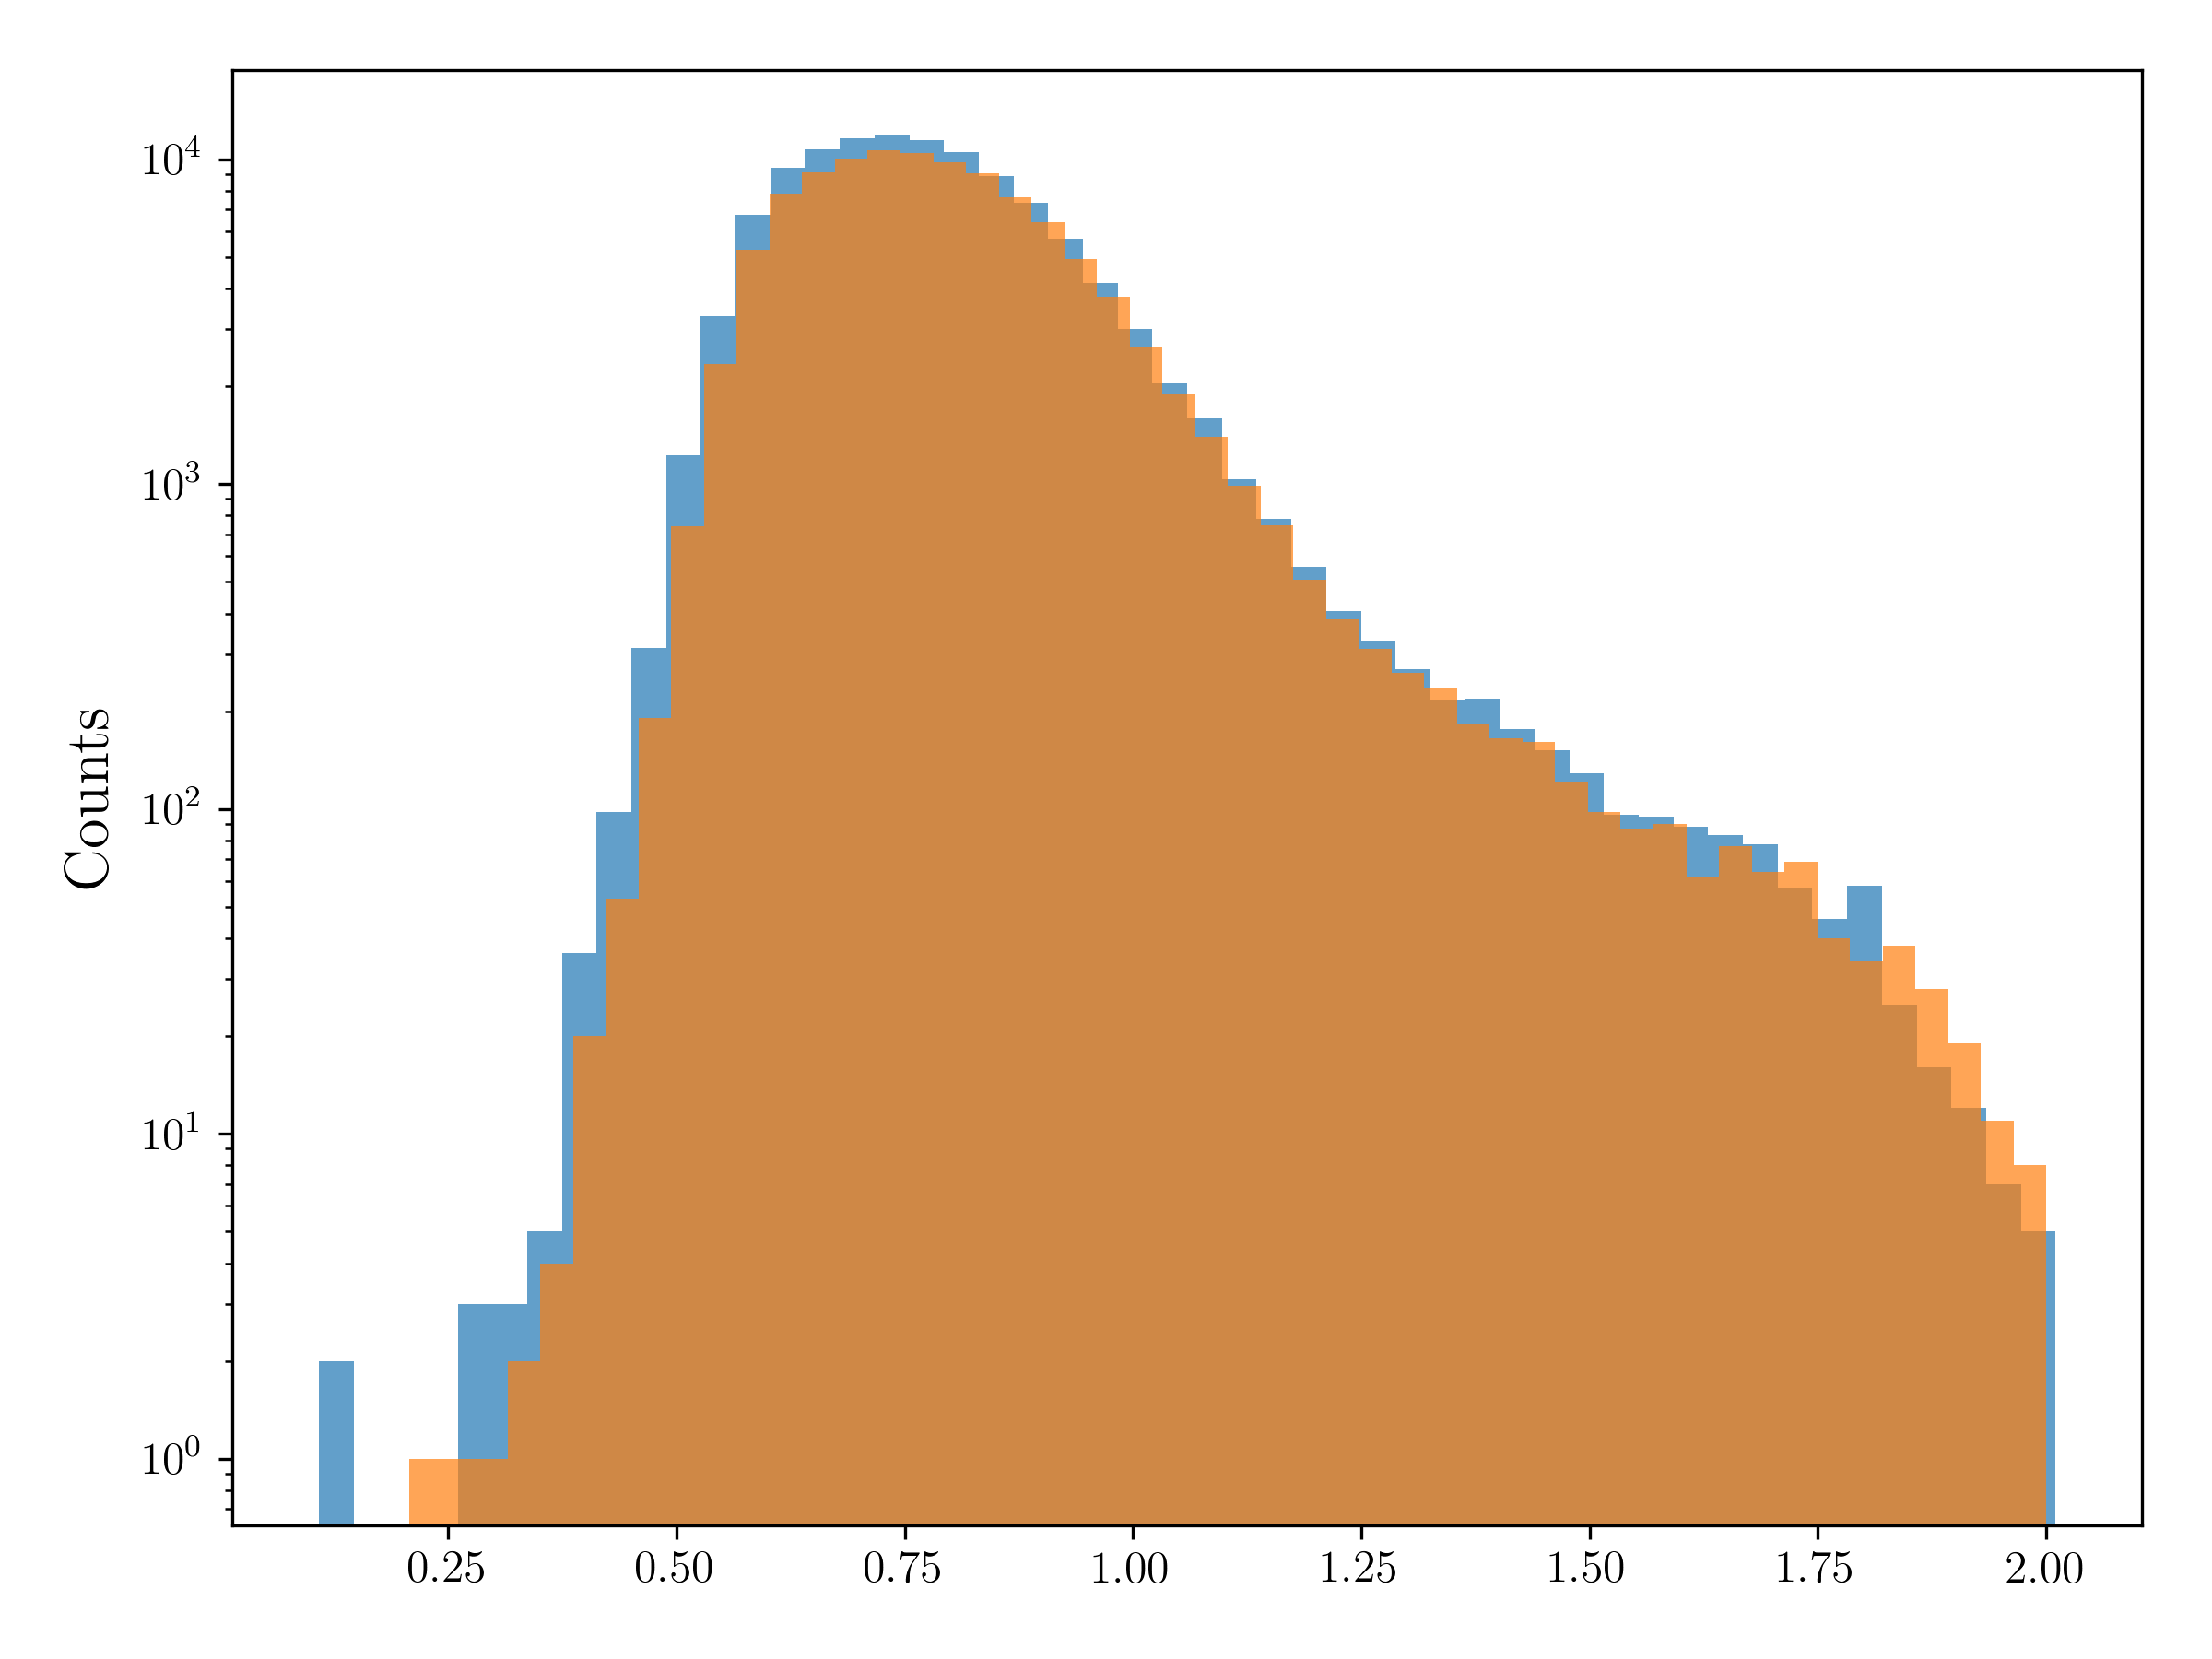

In [6]:
fig, ax = plt.subplots()
df_sim[light_mask].refit_beta.plot(kind='hist', bins=50, logy=True, ax=ax, alpha=0.7)
df_sim[heavy_mask].refit_beta.plot(kind='hist', bins=50, logy=True, ax=ax, alpha=0.7)
ax.set_ylabel('Counts')
plt.show()

<IPython.core.display.Javascript object>


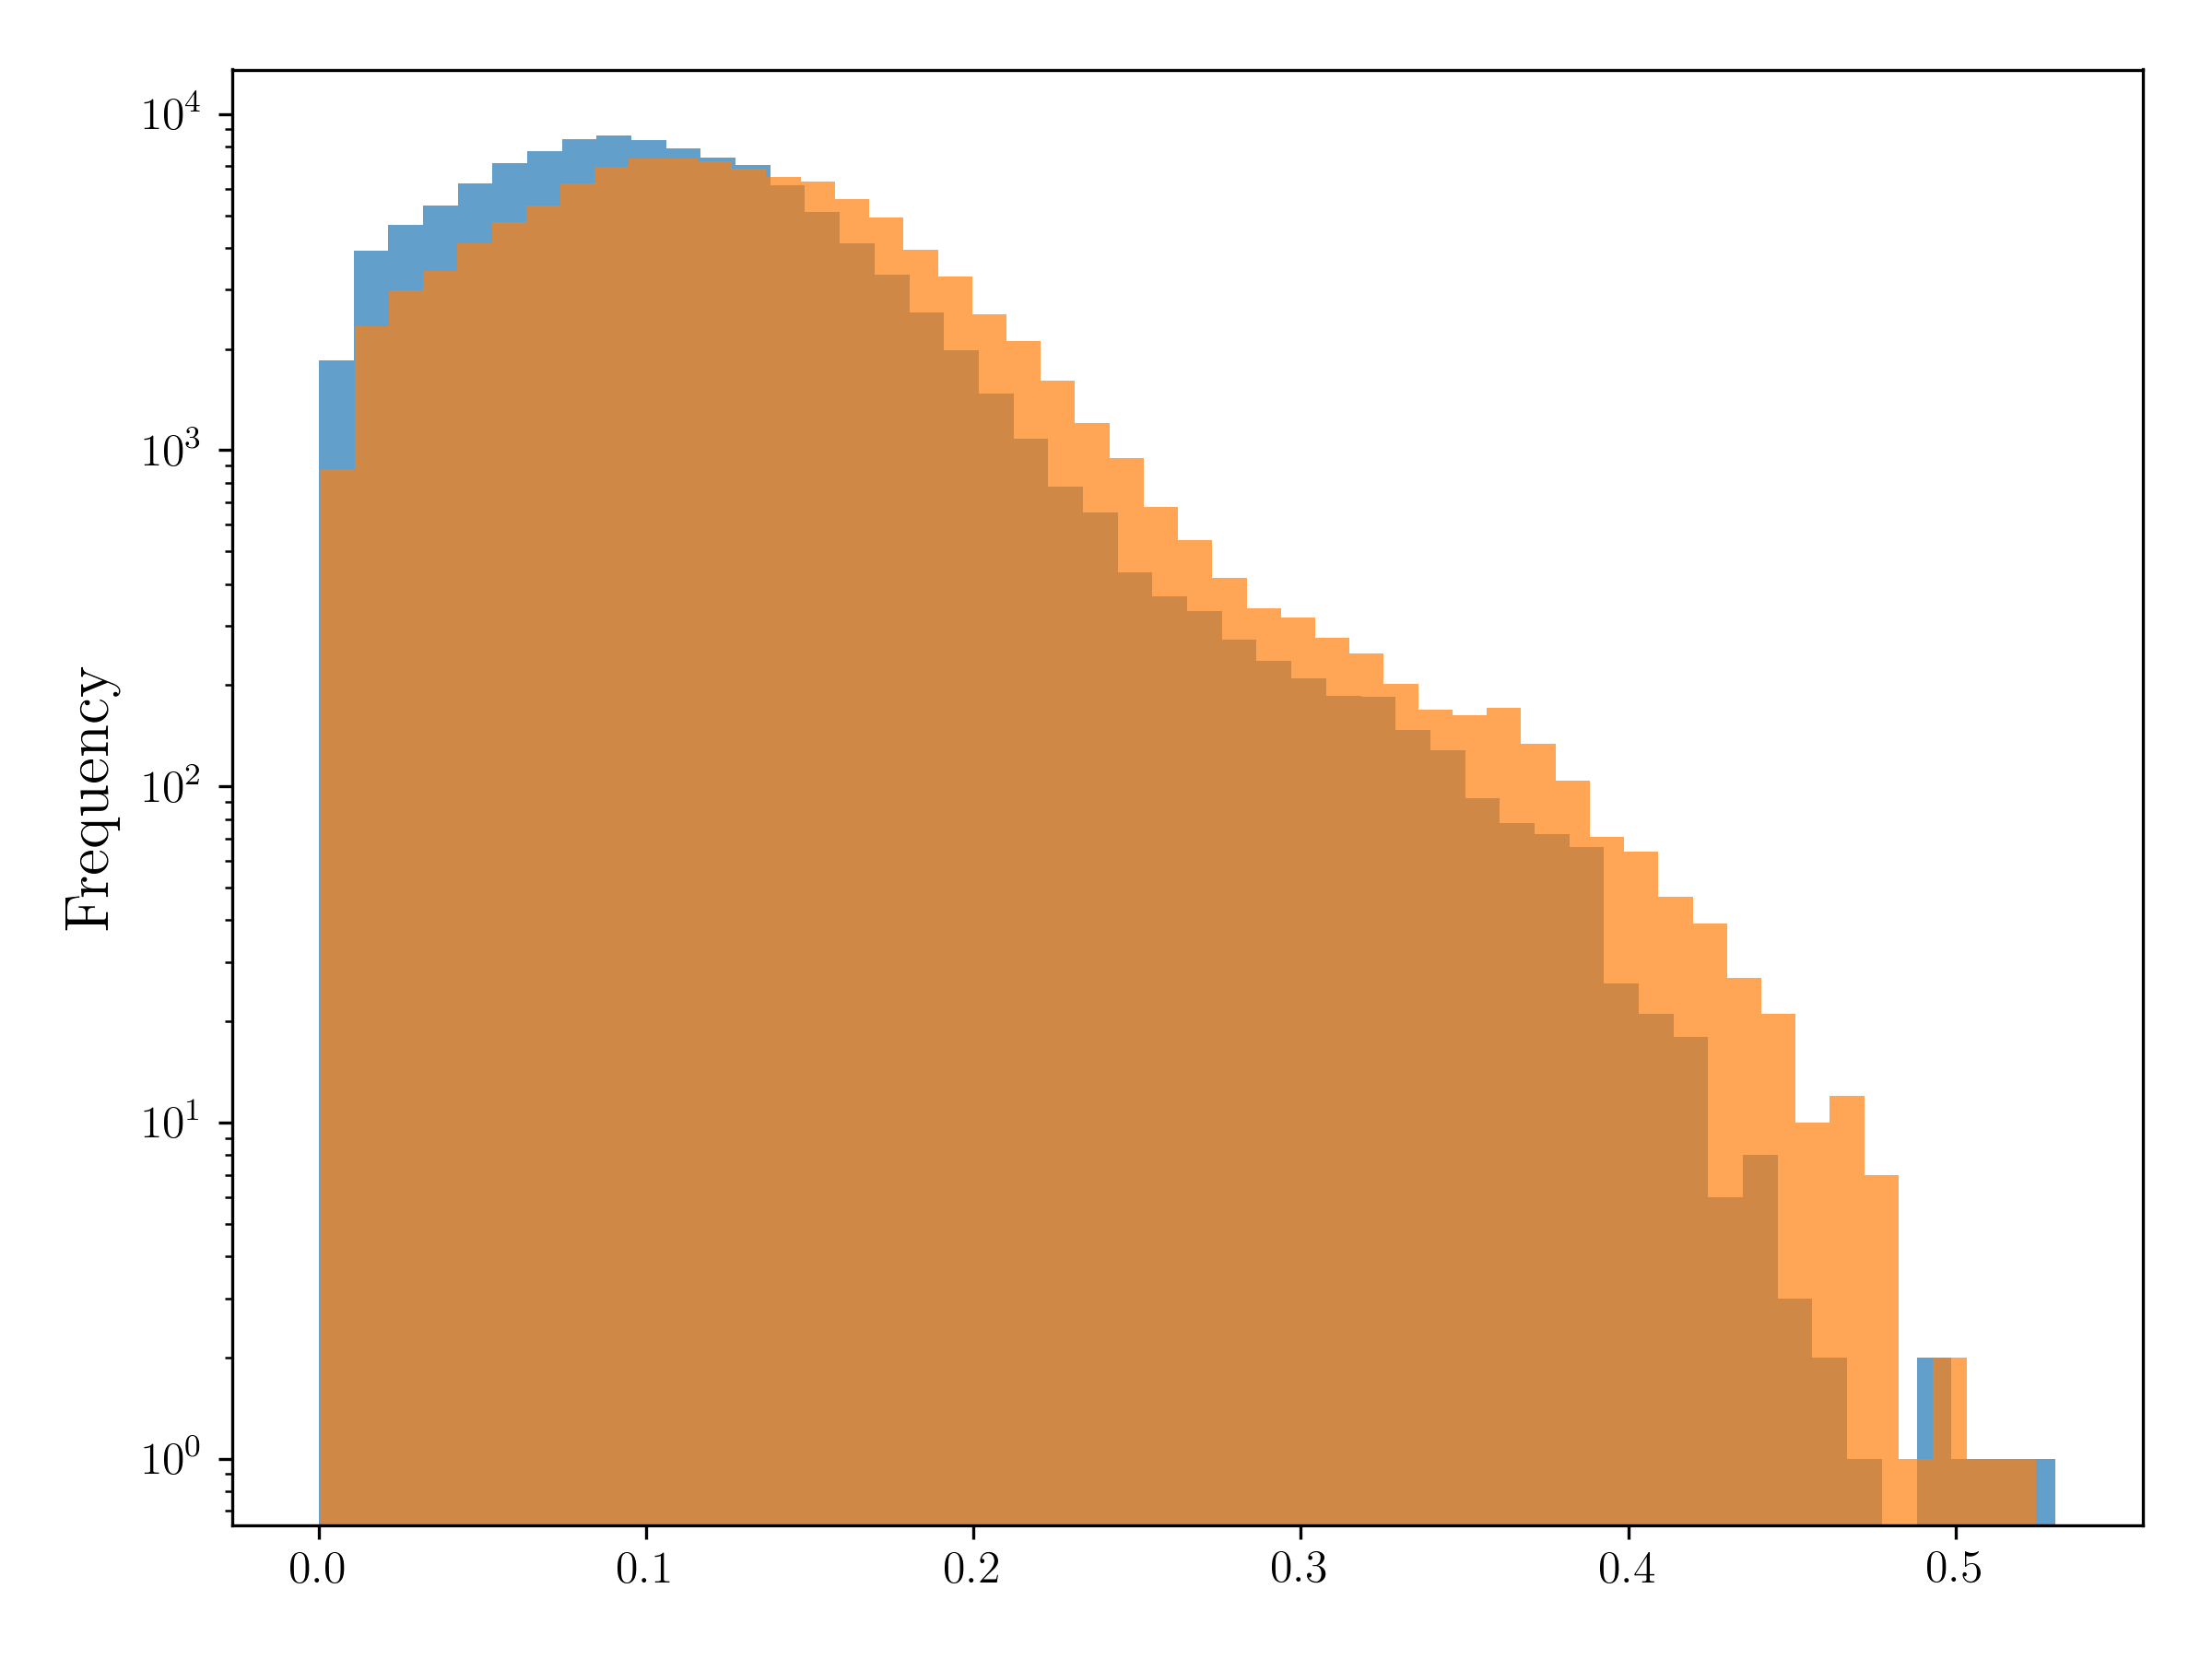

In [6]:
fig, ax = plt.subplots()
light_ratio = df_sim[light_mask].IceTop_charge_175m/df_sim[light_mask].IceTop_charge
light_ratio.plot(kind='hist', bins=50, logy=True, ax=ax, alpha=0.7)
heavy_ratio = df_sim[heavy_mask].IceTop_charge_175m/df_sim[heavy_mask].IceTop_charge
heavy_ratio.plot(kind='hist', bins=50, logy=True, ax=ax, alpha=0.7)
# df_sim[heavy_mask].IceTop_charge.plot(kind='hist', bins=50, logy=True, ax=ax)
plt.show()

<IPython.core.display.Javascript object>


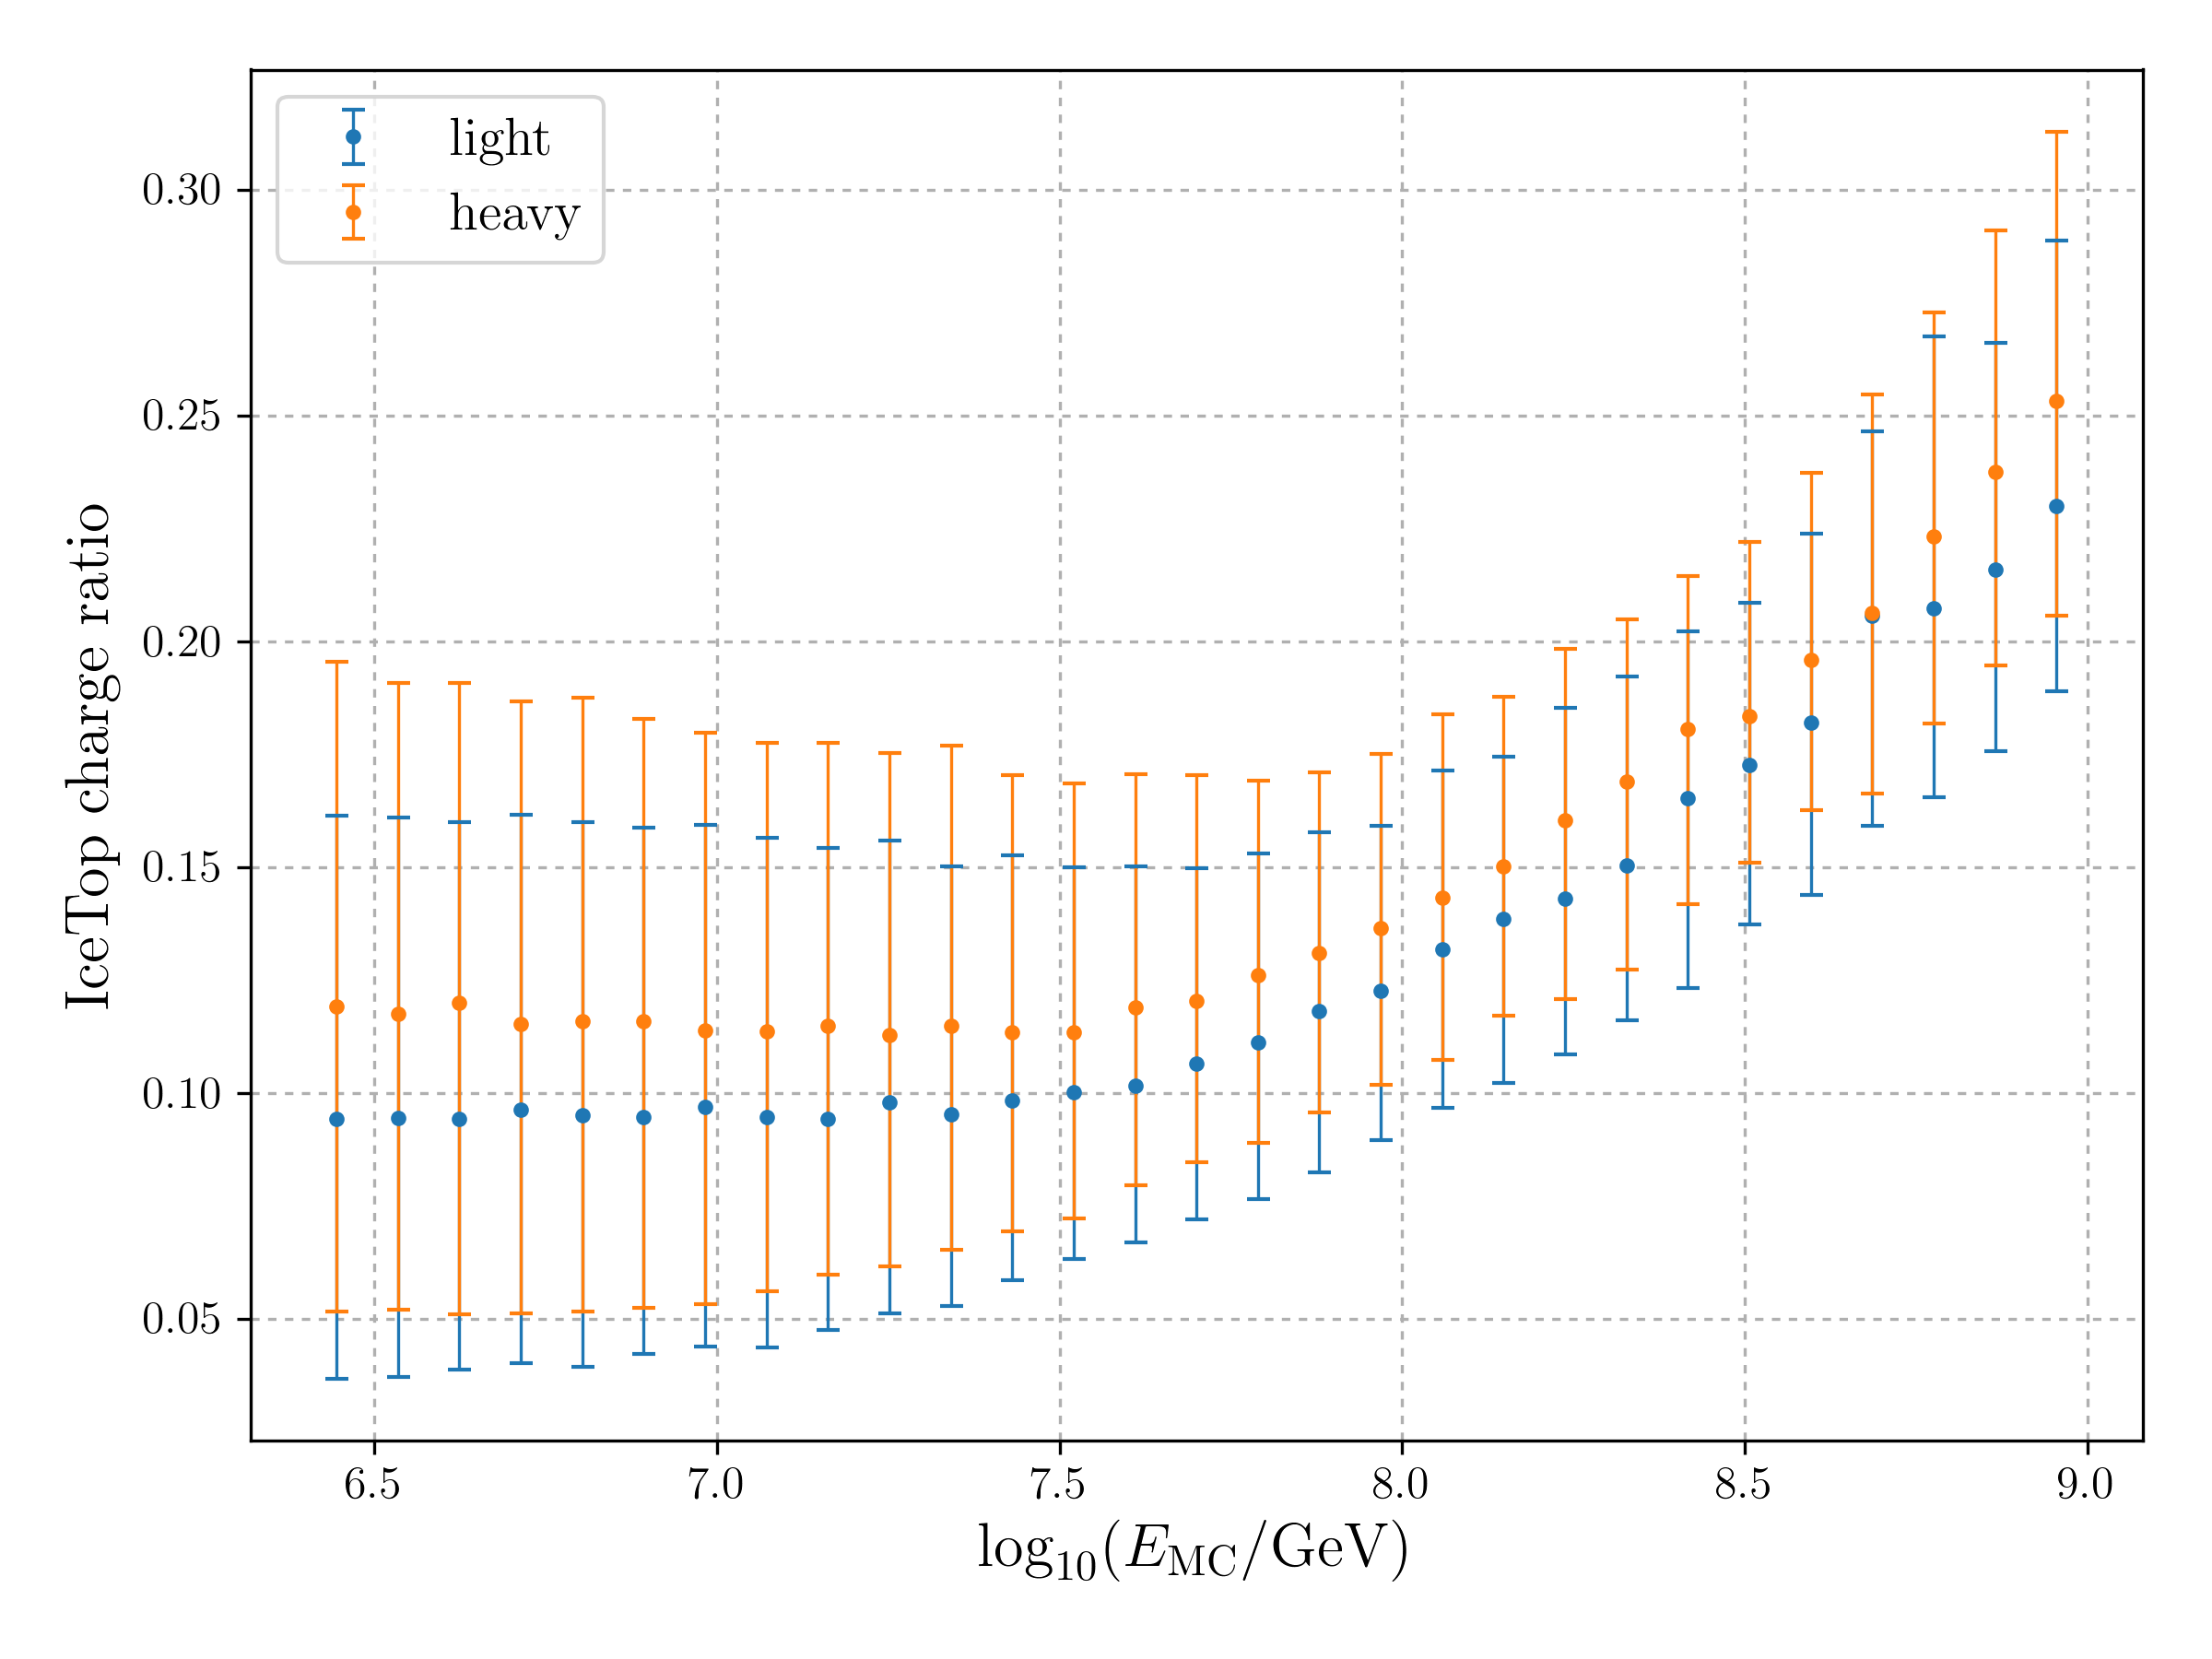

[  233.99363473   424.97908492   263.73623894 ...,  3734.2637911
    36.58128065    58.279057  ]
[  41.99171044   59.01437144   56.46427167 ...,  276.55148277  335.62583981
  423.51954047]


In [6]:
energybins = comp.analysis.get_energybins()
log_e_bins = np.linspace(6.4, 9.0, 30)
fig, ax = plt.subplots()
bin_centers, bin_medians_light, error_light = comp.analysis.get_medians(df_sim[light_mask].MC_log_energy.values,
#                                                             np.log10(df_sim[light_mask].IceTop_charge_175m.values),
                                                            df_sim[light_mask]['IT_charge_ratio'],
#                                                             df_sim[light_mask].IceTop_charge_175m.values/df_sim[light_mask].IceTop_charge.values,
                                                            log_e_bins)
#                                                             energybins.log_energy_bins)
print(df_sim[light_mask].IceTop_charge.values)

bin_centers, bin_medians_heavy, error_heavy = comp.analysis.get_medians(df_sim[heavy_mask].MC_log_energy.values,
#                                                             np.log10(df_sim[heavy_mask].IceTop_charge_175m.values),
                                                            df_sim[heavy_mask]['IT_charge_ratio'],
#                                                             df_sim[heavy_mask].IceTop_charge_175m.values/df_sim[heavy_mask].IceTop_charge.values,
                                                            log_e_bins)
print(df_sim[heavy_mask].IceTop_charge_175m.values)

ax.errorbar(bin_centers, bin_medians_light, yerr=error_light, label='light', ls='None', marker='.')
ax.errorbar(bin_centers, bin_medians_heavy, yerr=error_heavy, label='heavy', ls='None', marker='.')
ax.set_xlabel('$\log_{10}(E_{\mathrm{MC}}/\mathrm{GeV})$')
ax.set_ylabel('IceTop charge ratio')
ax.grid()
ax.legend()
plt.show()

<IPython.core.display.Javascript object>


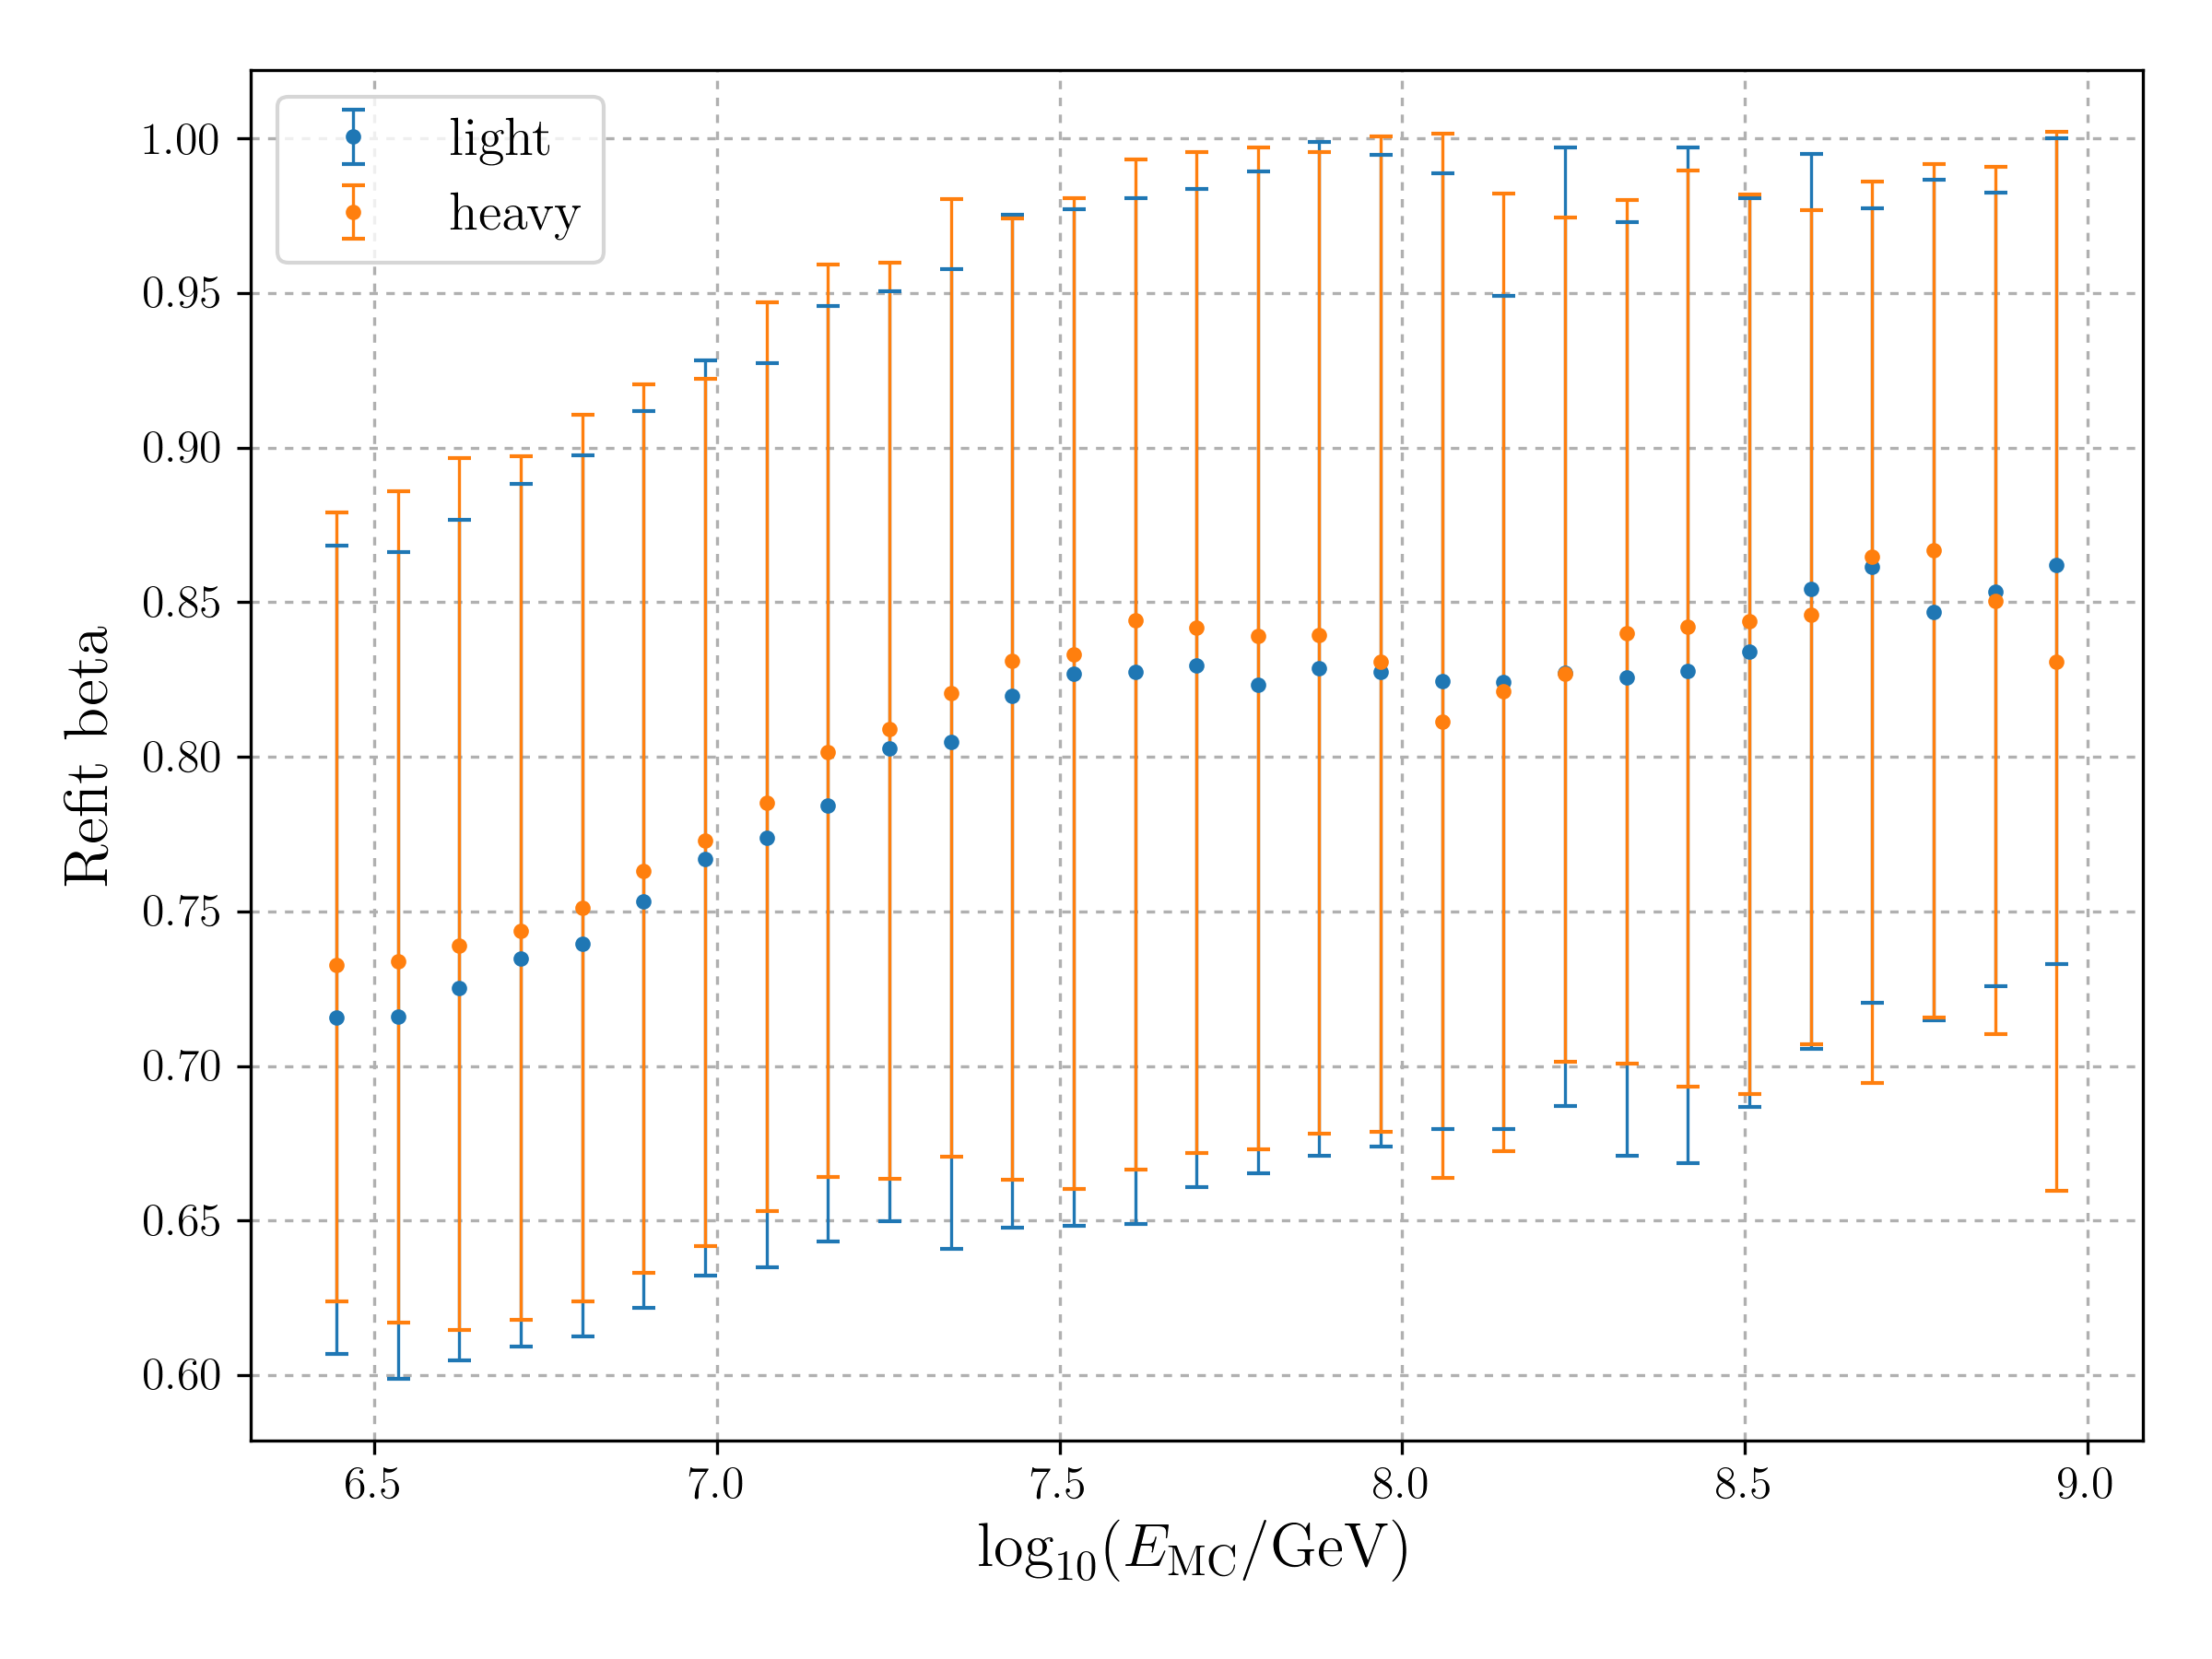

[  233.99363473   424.97908492   263.73623894 ...,  3734.2637911
    36.58128065    58.279057  ]
[  41.99171044   59.01437144   56.46427167 ...,  276.55148277  335.62583981
  423.51954047]


In [9]:
energybins = comp.analysis.get_energybins()
log_e_bins = np.linspace(6.4, 9.0, 30)
fig, ax = plt.subplots()
bin_centers, bin_medians_light, error_light = comp.analysis.get_medians(df_sim[light_mask].MC_log_energy.values,
#                                                             np.log10(df_sim[light_mask].IceTop_charge_175m.values),
                                                            df_sim[light_mask]['refit_beta'],
#                                                             df_sim[light_mask].IceTop_charge_175m.values/df_sim[light_mask].IceTop_charge.values,
                                                            log_e_bins)
#                                                             energybins.log_energy_bins)
print(df_sim[light_mask].IceTop_charge.values)

bin_centers, bin_medians_heavy, error_heavy = comp.analysis.get_medians(df_sim[heavy_mask].MC_log_energy.values,
#                                                             np.log10(df_sim[heavy_mask].IceTop_charge_175m.values),
                                                            df_sim[heavy_mask]['refit_beta'],
#                                                             df_sim[heavy_mask].IceTop_charge_175m.values/df_sim[heavy_mask].IceTop_charge.values,
                                                            log_e_bins)
print(df_sim[heavy_mask].IceTop_charge_175m.values)

ax.errorbar(bin_centers, bin_medians_light, yerr=error_light, label='light', ls='None', marker='.')
ax.errorbar(bin_centers, bin_medians_heavy, yerr=error_heavy, label='heavy', ls='None', marker='.')
ax.set_xlabel('$\log_{10}(E_{\mathrm{MC}}/\mathrm{GeV})$')
ax.set_ylabel('Refit beta')
ax.grid()
ax.legend()
plt.show()

<IPython.core.display.Javascript object>


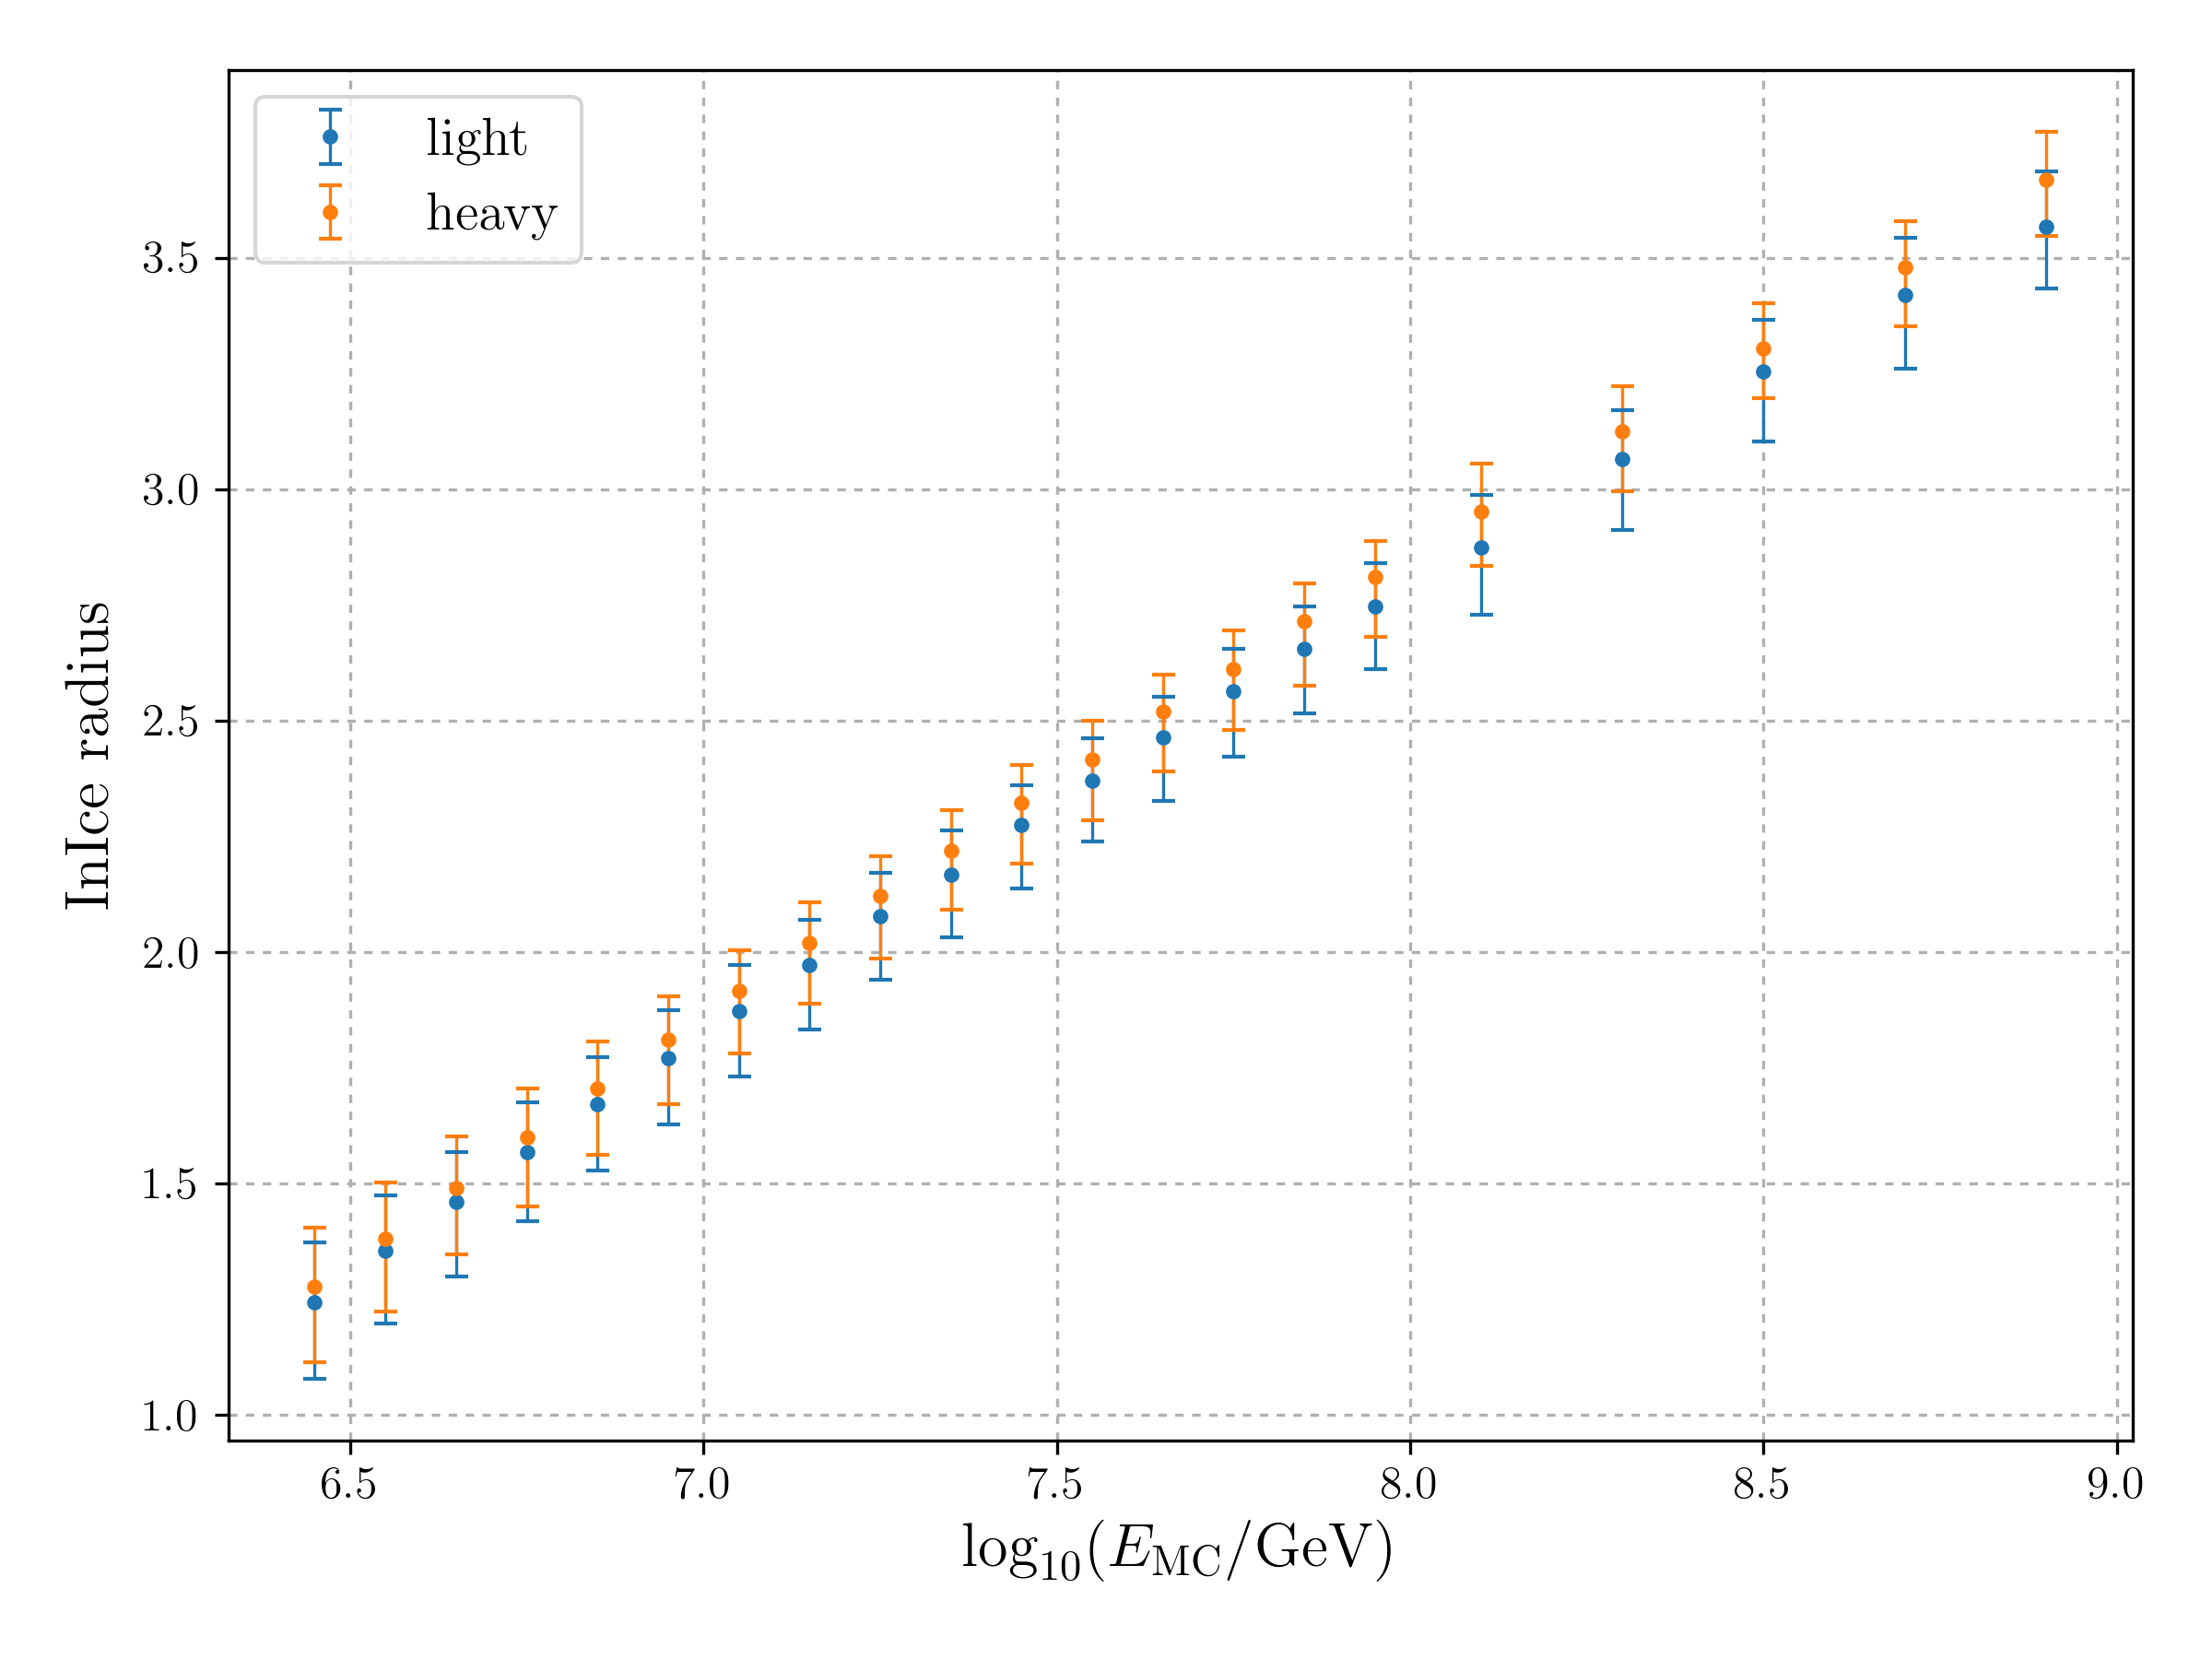

[  82.99618806   85.48093552   72.53942722 ...,  112.27001365   79.40478295
   76.23483925]
[ 100.32557283  108.69898595   97.13398243 ...,  118.82006015  114.18453454
  115.63854243]


In [8]:
energybins = comp.analysis.get_energybins()
fig, ax = plt.subplots()
bin_centers, bin_medians_light, error_light = comp.analysis.get_medians(df_sim[light_mask].MC_log_energy.values,
                                                            df_sim[light_mask]['log_IceTop_charge_175m'],
                                                            energybins.log_energy_bins)
print(df_sim[light_mask].avg_inice_radius_1_30.values)

bin_centers, bin_medians_heavy, error_heavy = comp.analysis.get_medians(df_sim[heavy_mask].MC_log_energy.values,
                                                            df_sim[heavy_mask]['log_IceTop_charge_175m'],
                                                            energybins.log_energy_bins)
print(df_sim[heavy_mask].avg_inice_radius_1_30.values)

ax.errorbar(bin_centers, bin_medians_light, yerr=error_light, label='light', ls='None', marker='.')
ax.errorbar(bin_centers, bin_medians_heavy, yerr=error_heavy, label='heavy', ls='None', marker='.')
ax.set_xlabel('$\log_{10}(E_{\mathrm{MC}}/\mathrm{GeV})$')
ax.set_ylabel('InIce radius')
ax.grid()
ax.legend()
plt.show()

<IPython.core.display.Javascript object>


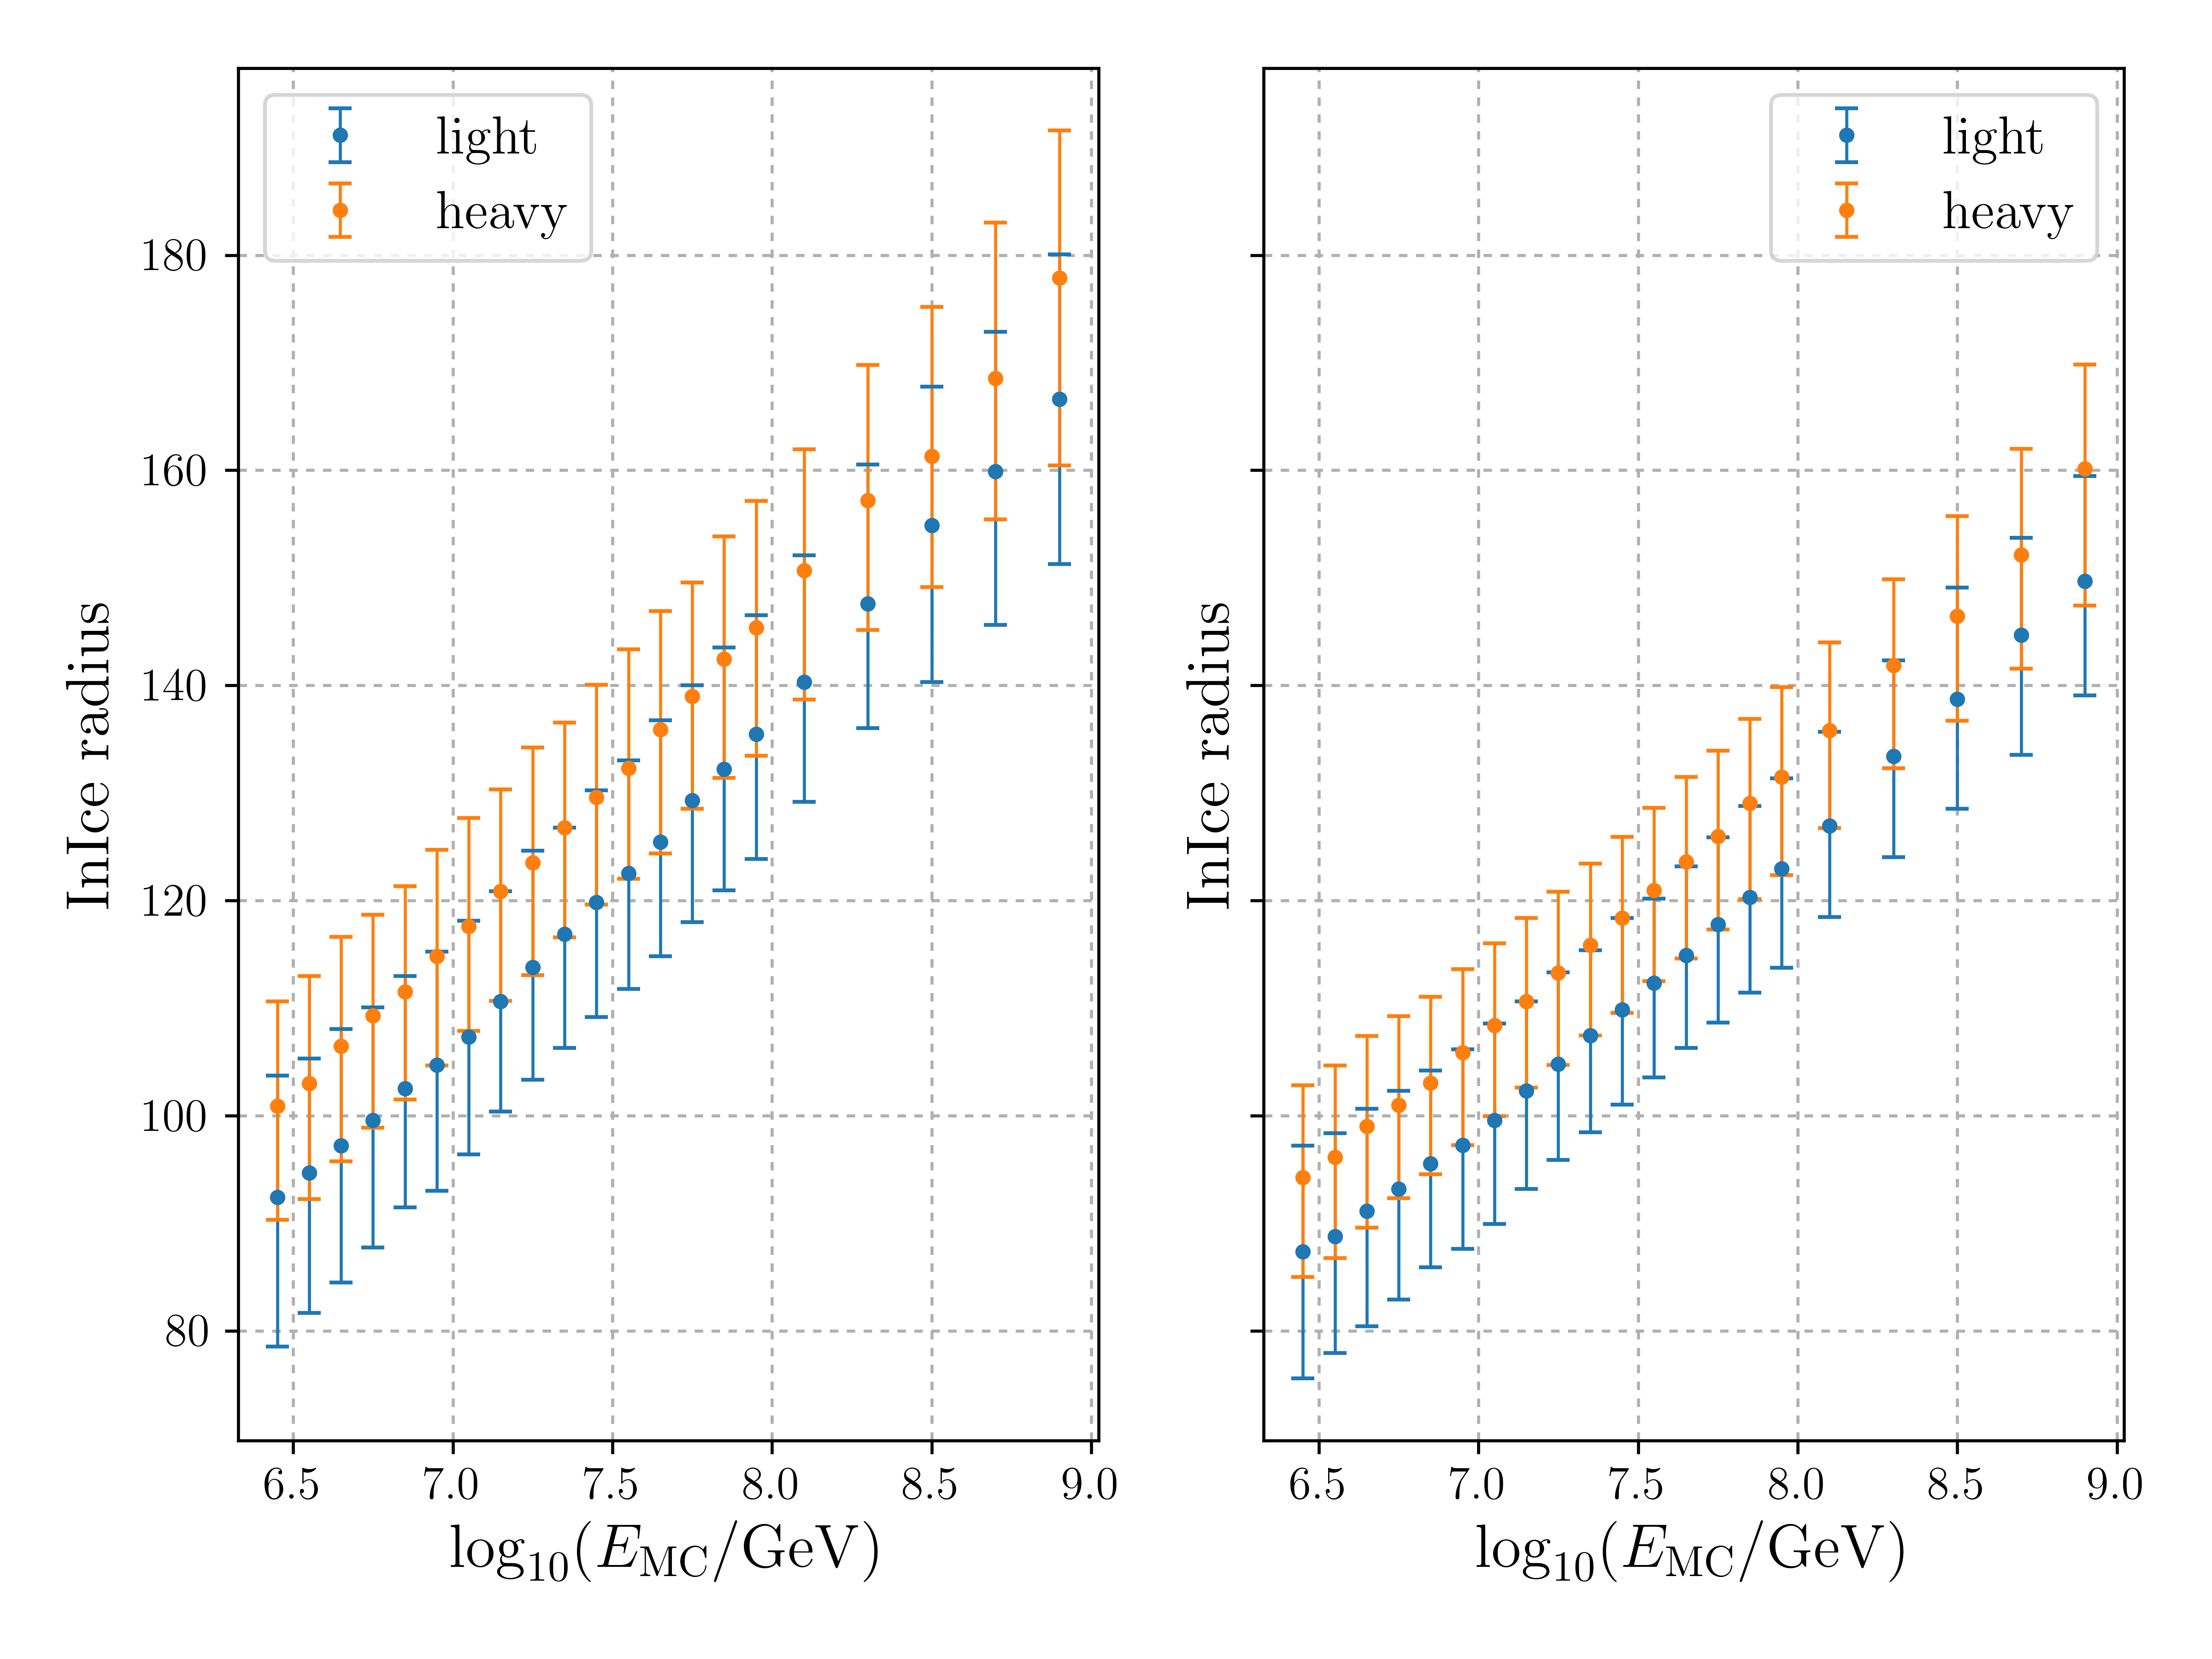

[  87.13774878   90.15561286   78.94222433 ...,  124.095852     77.75987213
   77.26672742]
[ 107.07188445  111.48396849  104.21450775 ...,  130.50329063  129.48606006
  131.06563202]
[  82.99618806   85.48093552   72.53942722 ...,  112.27001365   79.40478295
   76.23483925]
[ 100.32557283  108.69898595   97.13398243 ...,  118.82006015  114.18453454
  115.63854243]


In [11]:
energybins = comp.analysis.get_energybins()
fig, axarr = plt.subplots(1, 2, sharex=True, sharey=True)
for key, ax in zip(['avg_inice_radius_1_60', 'avg_inice_radius_1_30'], axarr.flatten()):
    bin_centers, bin_medians_light, error_light = comp.analysis.get_medians(df_sim[light_mask].MC_log_energy.values,
                                                                df_sim[light_mask][key],
                                                                energybins.log_energy_bins)
    print(df_sim[light_mask][key].values)

    bin_centers, bin_medians_heavy, error_heavy = comp.analysis.get_medians(df_sim[heavy_mask].MC_log_energy.values,
                                                                df_sim[heavy_mask][key],
                                                                energybins.log_energy_bins)
    print(df_sim[heavy_mask][key].values)

    ax.errorbar(bin_centers, bin_medians_light, yerr=error_light, label='light', ls='None', marker='.')
    ax.errorbar(bin_centers, bin_medians_heavy, yerr=error_heavy, label='heavy', ls='None', marker='.')
    ax.set_xlabel('$\log_{10}(E_{\mathrm{MC}}/\mathrm{GeV})$')
    ax.set_ylabel('InIce radius')
    ax.grid()
    ax.legend()
plt.show()

<IPython.core.display.Javascript object>


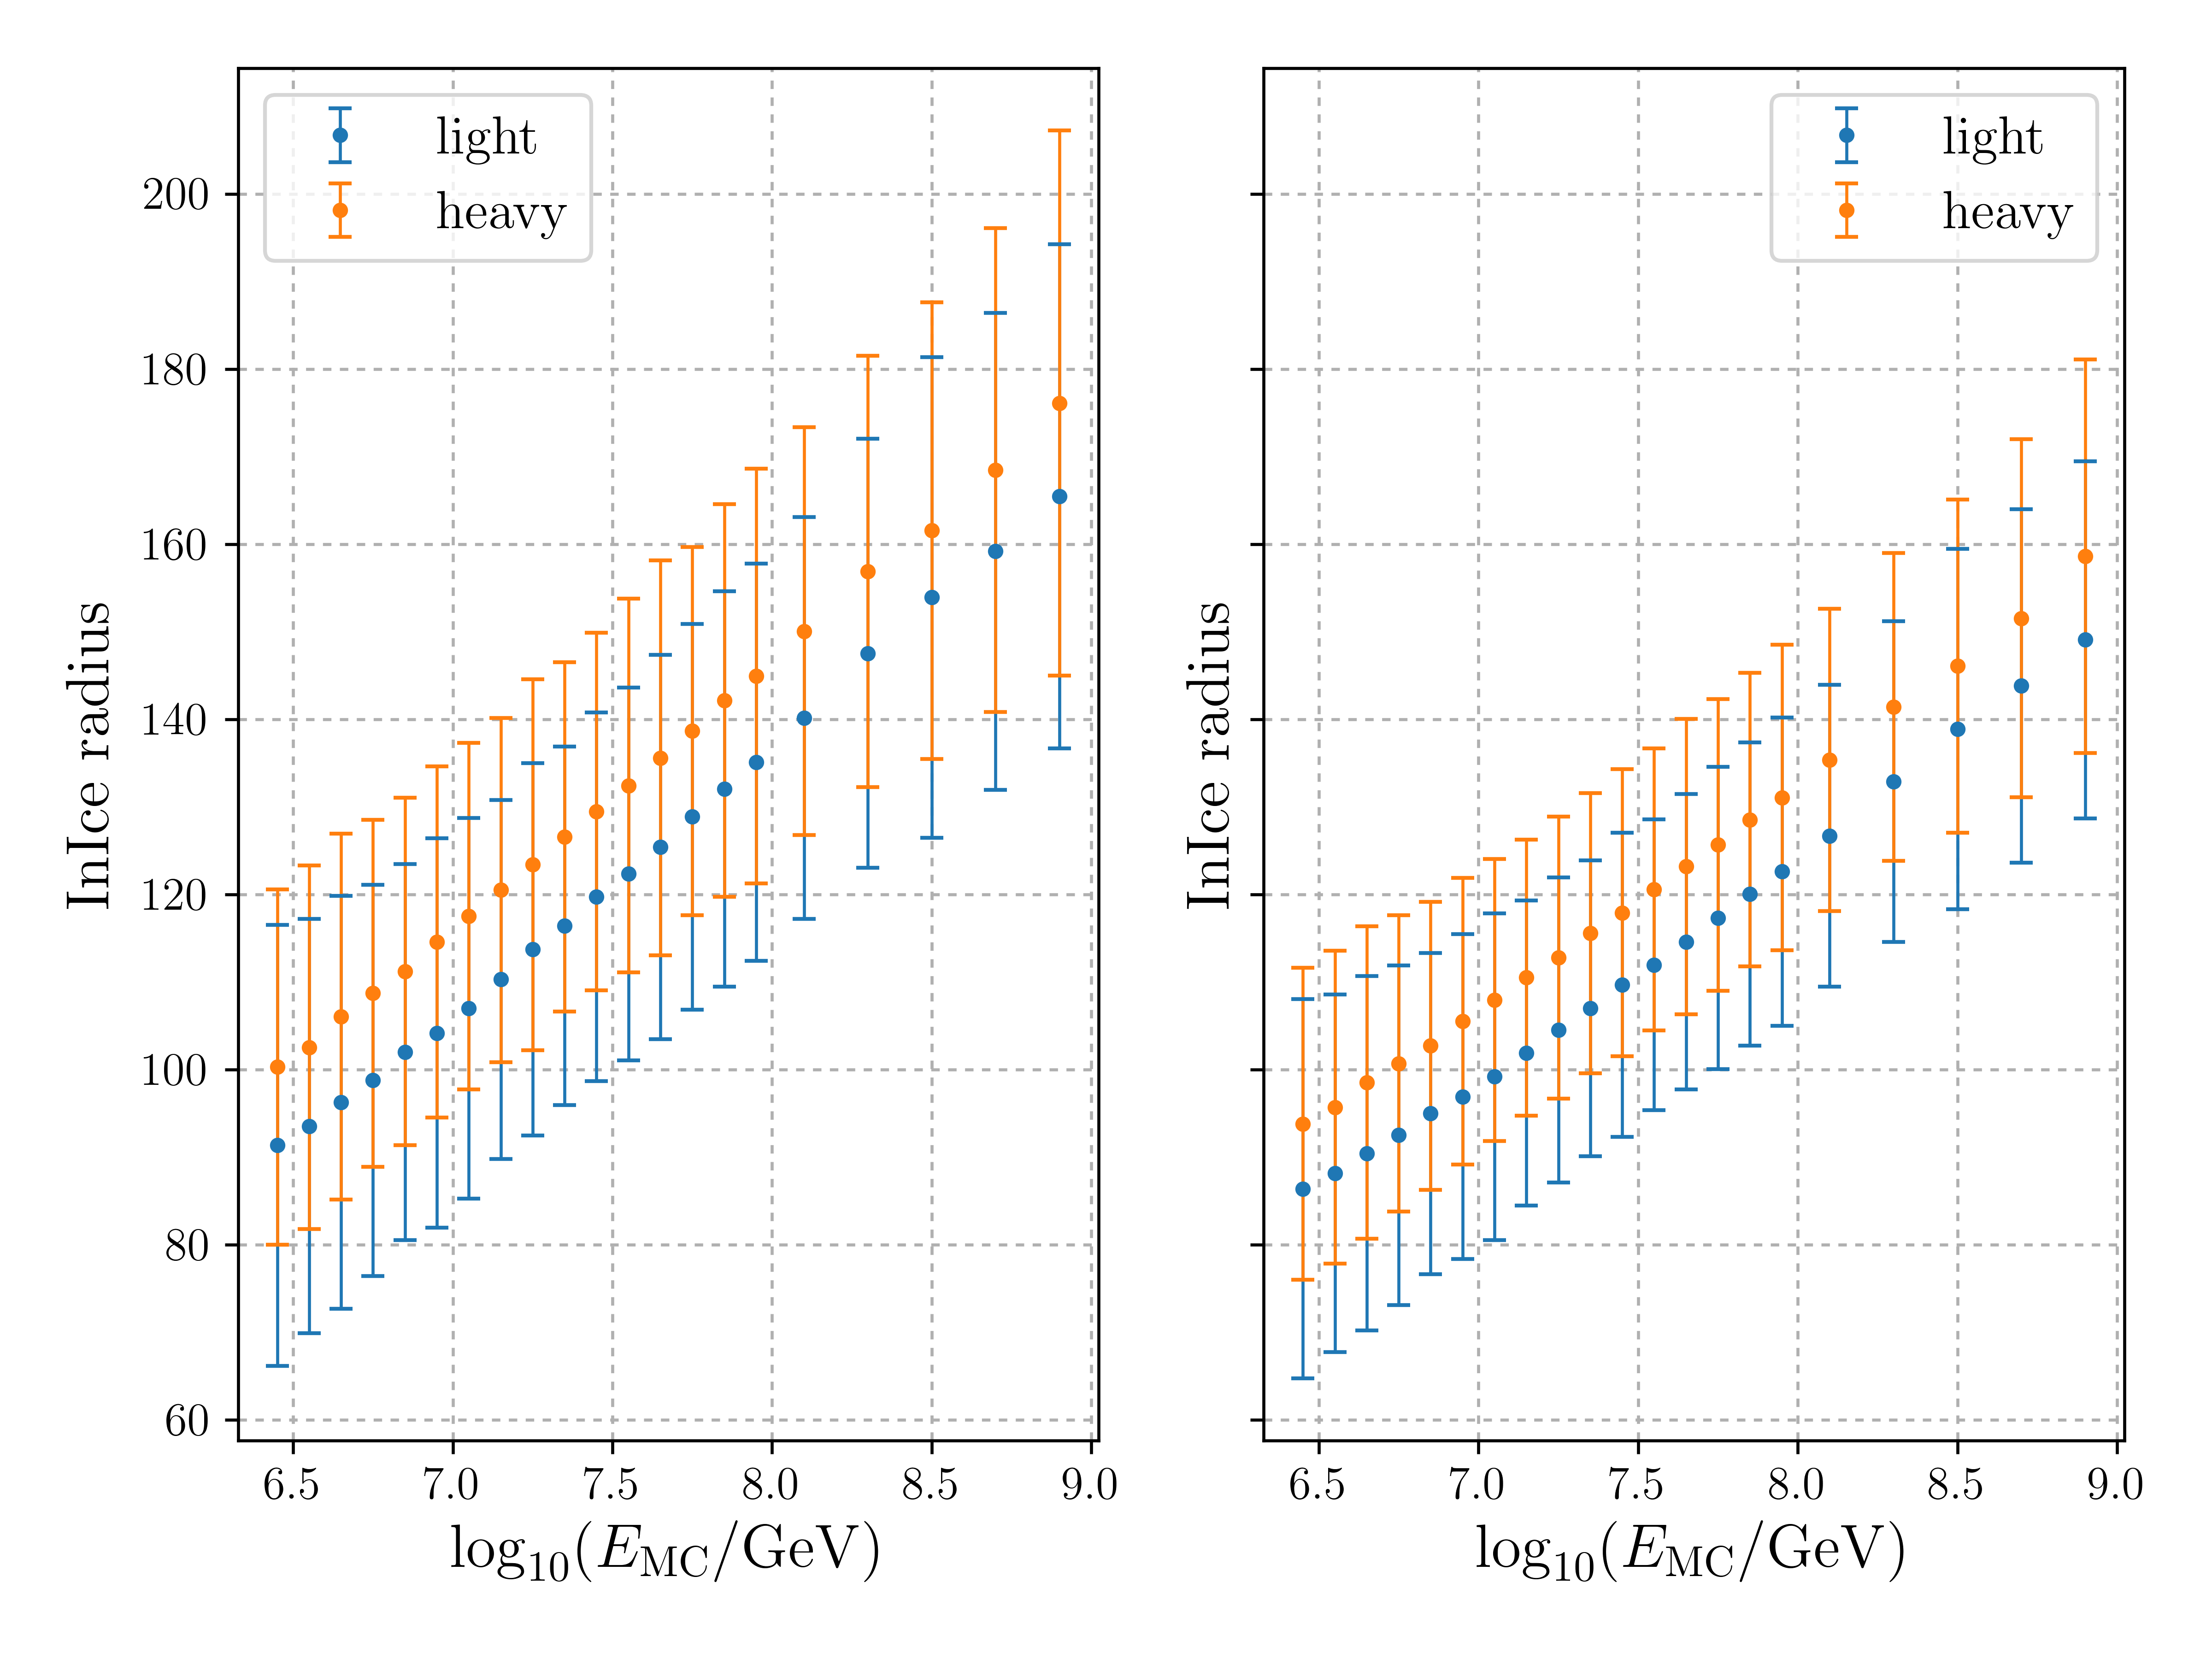

[  87.13774878   90.15561286   78.94222433 ...,  124.095852     77.75987213
   77.26672742]
[ 107.07188445  111.48396849  104.21450775 ...,  130.50329063  129.48606006
  131.06563202]
[  82.99618806   85.48093552   72.53942722 ...,  112.27001365   79.40478295
   76.23483925]
[ 100.32557283  108.69898595   97.13398243 ...,  118.82006015  114.18453454
  115.63854243]


In [9]:
energybins = comp.analysis.get_energybins()
fig, axarr = plt.subplots(1, 2, sharex=True, sharey=True)
for key, ax in zip(['avg_inice_radius_1_60', 'avg_inice_radius_1_30'], axarr.flatten()):
    avg_light, std_light, bin_edges = comp.analysis.get_avg_std(df_sim[light_mask].MC_log_energy.values,
                                                                df_sim[light_mask][key],
                                                                energybins.log_energy_bins)
    print(df_sim[light_mask][key].values)

    avg_heavy, std_heavy, bin_edges = comp.analysis.get_avg_std(df_sim[heavy_mask].MC_log_energy.values,
                                                                df_sim[heavy_mask][key],
                                                                energybins.log_energy_bins)
    print(df_sim[heavy_mask][key].values)

    ax.errorbar(bin_centers, avg_light, yerr=std_light, label='light', ls='None', marker='.')
    ax.errorbar(bin_centers, avg_heavy, yerr=std_heavy, label='heavy', ls='None', marker='.')
    ax.set_xlabel('$\log_{10}(E_{\mathrm{MC}}/\mathrm{GeV})$')
    ax.set_ylabel('InIce radius')
    ax.grid()
    ax.legend()
plt.show()

In [24]:
np.sum(null_mask)/len(df_sim)

0.043667241907649632

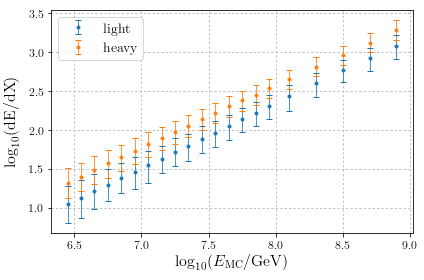

In [11]:
energybins = comp.analysis.get_energybins()
fig, ax = plt.subplots()
light_mask = df_sim['MC_comp_class'] == 'light'
bin_centers, bin_medians_light, error_light = comp.analysis.get_medians(df_sim[light_mask].MC_log_energy.values,
                                                            df_sim[light_mask].log_dEdX.values,
                                                            energybins.log_energy_bins)
heavy_mask = df_sim['MC_comp_class'] == 'heavy'
bin_centers, bin_medians_heavy, error_heavy = comp.analysis.get_medians(df_sim[heavy_mask].MC_log_energy.values,
                                                            df_sim[heavy_mask].log_dEdX.values,
                                                            energybins.log_energy_bins)

ax.errorbar(bin_centers, bin_medians_light, yerr=error_light, label='light', ls='None', marker='.')
ax.errorbar(bin_centers, bin_medians_heavy, yerr=error_heavy, label='heavy', ls='None', marker='.')
ax.set_xlabel('$\log_{10}(E_{\mathrm{MC}}/\mathrm{GeV})$')
ax.set_ylabel('$\log_{10}(\mathrm{dE/dX})$')
ax.grid()
ax.legend()
plt.show()

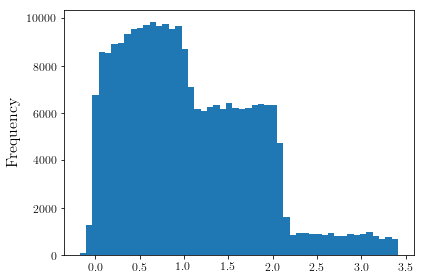

In [5]:
df_sim.log_s125.plot(kind='hist', bins=50)

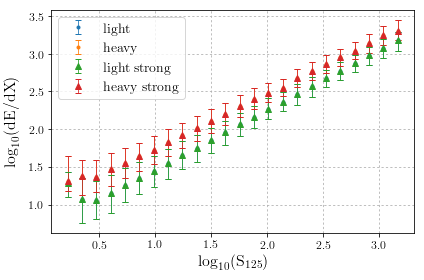

In [6]:
s125_bins = np.linspace(-1, 4, 40)
fig, ax = plt.subplots()
light_mask = (df_sim['MC_comp_class'] == 'light') & (df_sim['lap_log_energy'] > 6.4) & (df_sim['lap_log_energy'] < 9.0)
bin_centers, bin_medians_light, error_light = comp.analysis.get_medians(df_sim[light_mask].log_s125.values,
                                                            df_sim[light_mask].log_dEdX.values,
                                                            s125_bins)
heavy_mask = (df_sim['MC_comp_class'] == 'heavy') & (df_sim['lap_log_energy'] > 6.4) & (df_sim['lap_log_energy'] < 9.0)
bin_centers, bin_medians_heavy, error_heavy = comp.analysis.get_medians(df_sim[heavy_mask].log_s125.values,
                                                            df_sim[heavy_mask].log_dEdX.values,
                                                            s125_bins)

ax.errorbar(bin_centers, bin_medians_light, yerr=error_light, label='light', ls='None', marker='.')
ax.errorbar(bin_centers, bin_medians_heavy, yerr=error_heavy, label='heavy', ls='None', marker='.')


bin_centers, bin_medians_light, error_light = comp.analysis.get_medians(df_sim[light_mask].log_s125.values,
                                                            df_sim[light_mask].log_dEdX_strong.values,
                                                            s125_bins)
bin_centers, bin_medians_heavy, error_heavy = comp.analysis.get_medians(df_sim[heavy_mask].log_s125.values,
                                                            df_sim[heavy_mask].log_dEdX_strong.values,
                                                            s125_bins)

ax.errorbar(bin_centers, bin_medians_light, yerr=error_light, label='light strong', ls='None', marker='^')
ax.errorbar(bin_centers, bin_medians_heavy, yerr=error_heavy, label='heavy strong', ls='None', marker='^')


ax.set_xlabel('$\log_{10}(\mathrm{S_{125}})$')
ax.set_ylabel('$\log_{10}(\mathrm{dE/dX})$')
ax.grid()
ax.legend()
plt.savefig('/home/jbourbeau/public_html/figures/energyloss-vs-s125-dist.png')
plt.show()

In [8]:
light_mask = df_sim['MC_comp_class'] == 'light'
heavy_mask = df_sim['MC_comp_class'] == 'heavy'
energy_mask = (df_sim['lap_log_energy'] > 7.5) & (df_sim['lap_log_energy'] <= 7.6)

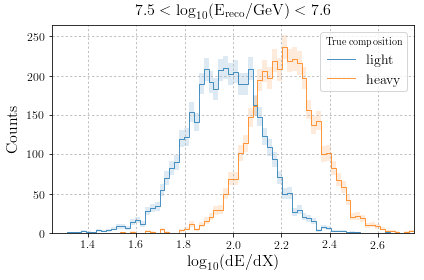

In [9]:
s125_bins = np.linspace(1.25, 2.75, 75)

fig, ax = plt.subplots()

# df_sim['log_dEdX'][light_mask & energy_mask].plot(kind='hist', bins=bins, alpha=0.75, label='light', ax=ax)
# df_sim['log_dEdX'][heavy_mask & energy_mask].plot(kind='hist', bins=bins, alpha=0.75, label='heavy', ax=ax)

light_counts = np.histogram(df_sim['log_dEdX'][light_mask & energy_mask], s125_bins)[0]
heavy_counts = np.histogram(df_sim['log_dEdX'][heavy_mask & energy_mask], s125_bins)[0]

plotting.plot_steps(s125_bins, light_counts, yerr=np.sqrt(light_counts), ax=ax, color='C0', label='light')
plotting.plot_steps(s125_bins, heavy_counts, yerr=np.sqrt(heavy_counts), ax=ax, color='C1', label='heavy')

# ax.set_yscale("log", nonposy='clip')
ax.set_ylabel('Counts')
ax.set_xlabel('$\mathrm{\\log_{10}(dE/dX)}$')
ax.set_title('$\mathrm{ 7.5 < \\log_{10}(E_{reco}/GeV) < 7.6 }$')
ax.set_xlim([1.25, 2.75])
ax.set_ylim(0)
ax.grid()
ax.legend(title='True composition')
plt.savefig('/home/jbourbeau/public_html/figures/dEdX-dist-example.png')
plt.show()

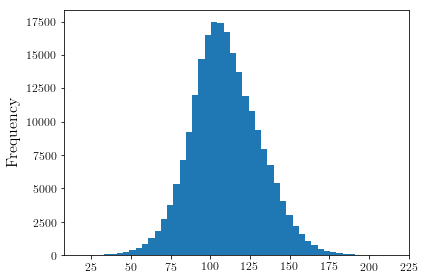

In [12]:
df_sim.avg_inice_radius.plot(kind='hist', bins=50)

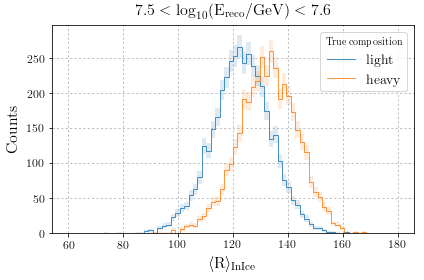

In [18]:
radius_bins = np.linspace(60, 180, 75)

fig, ax = plt.subplots()

# df_sim['log_dEdX'][light_mask & energy_mask].plot(kind='hist', bins=bins, alpha=0.75, label='light', ax=ax)
# df_sim['log_dEdX'][heavy_mask & energy_mask].plot(kind='hist', bins=bins, alpha=0.75, label='heavy', ax=ax)

light_counts = np.histogram(df_sim['avg_inice_radius'][light_mask & energy_mask], radius_bins)[0]
heavy_counts = np.histogram(df_sim['avg_inice_radius'][heavy_mask & energy_mask], radius_bins)[0]

plotting.plot_steps(radius_bins, light_counts, yerr=np.sqrt(light_counts), ax=ax, color='C0', label='light')
plotting.plot_steps(radius_bins, heavy_counts, yerr=np.sqrt(heavy_counts), ax=ax, color='C1', label='heavy')

# ax.set_yscale("log", nonposy='clip')
ax.set_ylabel('Counts')
ax.set_xlabel('$\mathrm{\langle R \\rangle _{InIce}}$')
ax.set_title('$\mathrm{ 7.5 < \\log_{10}(E_{reco}/GeV) < 7.6 }$')
# ax.set_xlim([70, 170])
ax.set_ylim(0)
ax.grid()
ax.legend(title='True composition')
plt.savefig('/home/jbourbeau/public_html/figures/avg-radius-dist-example.png')
plt.show()

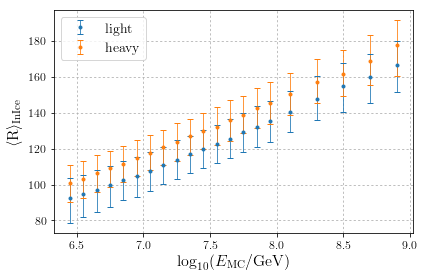

In [19]:
energybins = comp.analysis.get_energybins()
fig, ax = plt.subplots()
light_mask = df_sim['MC_comp_class'] == 'light'
bin_centers, bin_medians_light, error_light = comp.analysis.get_medians(df_sim[light_mask].MC_log_energy.values,
                                                            df_sim[light_mask].avg_inice_radius.values,
                                                            energybins.log_energy_bins)
heavy_mask = df_sim['MC_comp_class'] == 'heavy'
bin_centers, bin_medians_heavy, error_heavy = comp.analysis.get_medians(df_sim[heavy_mask].MC_log_energy.values,
                                                            df_sim[heavy_mask].avg_inice_radius.values,
                                                            energybins.log_energy_bins)

ax.errorbar(bin_centers, bin_medians_light, yerr=error_light, label='light', ls='None', marker='.')
ax.errorbar(bin_centers, bin_medians_heavy, yerr=error_heavy, label='heavy', ls='None', marker='.')
ax.set_xlabel('$\log_{10}(E_{\mathrm{MC}}/\mathrm{GeV})$')
ax.set_ylabel('$\mathrm{\langle R \\rangle _{InIce}}$')
ax.grid()
ax.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()

s50 = df_sim['log_s50'].values
s50_bins = np.linspace(1, 4, 100)
s50_midpoints = (s50_bins[1:] + s50_bins[:-1]) / 2

light_mask = (df_sim.MC_comp_class == 'light').values
heavy_mask = (df_sim.MC_comp_class == 'heavy').values

light_counts = np.histogram(s50[light_mask], s50_bins)[0]
heavy_counts = np.histogram(s50[heavy_mask], s50_bins)[0]

plotting.plot_steps(s50_midpoints, light_counts, np.sqrt(light_counts), ax, 'C0', 'MC light')
plotting.plot_steps(s50_midpoints, heavy_counts, np.sqrt(heavy_counts), ax, 'C1', 'MC heavy')
ax.set_xlabel('$\mathrm{S}_{50}$')
ax.set_ylabel('Counts')
# ax.set_yscale("log", nonposy='clip')
ax.grid()
ax.legend()
plt.show()

In [ ]:
df_sim.columns.values

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df_sim[df_sim.MC_comp_class == 'light']['lap_s50'],
          df_sim[df_sim.MC_comp_class == 'light']['eloss_1500_standard'],
          label='MC light', alpha=0.5)
ax.scatter(df_sim[df_sim.MC_comp_class == 'heavy']['lap_s50'],
          df_sim[df_sim.MC_comp_class == 'heavy']['eloss_1500_standard'],
          label='MC heavy', alpha=0.5)
plt.show()

In [20]:
df_sim.keys()

Index([u'IceTopMaxSignal', u'IceTopMaxSignalInEdge', u'IceTopMaxSignalString',
       u'IceTopNeighbourMaxSignal', u'IceTopQualityCuts',
       u'IceTop_FractionContainment', u'IceTop_charge', u'IceTop_charge_175m',
       u'InIceQualityCuts', u'InIceQualityCuts_MilliNCascAbove2',
       u'InIceQualityCuts_MilliQtotRatio',
       u'InIceQualityCuts_MilliRloglBelow2',
       u'InIceQualityCuts_NCh_CoincLaputopCleanedPulsesAbove7',
       u'InIceQualityCuts_StochRecoSucceeded', u'InIce_FractionContainment',
       u'InIce_charge_1_60', u'Laputop_IceTop_FractionContainment',
       u'Laputop_InIce_FractionContainment', u'MC_azimuth', u'MC_comp',
       u'MC_comp_class', u'MC_energy', u'MC_type', u'MC_x', u'MC_y',
       u'MC_zenith', u'NChannels_1_60', u'NHits_1_60', u'NStations',
       u'StationDensity', u'angle_MC_Laputop', u'avg_inice_radius',
       u'eloss_1500_standard', u'eloss_1500_strong', u'end_time_mjd',
       u'lap_azimuth', u'lap_beta', u'lap_chi2', u'lap_energy',
       u'

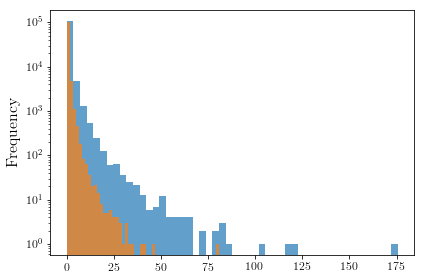

In [21]:
fig, ax = plt.subplots()
light_ratio = df_sim[light_mask].IceTop_charge/df_sim[light_mask].InIce_charge_1_60
light_ratio.plot(kind='hist', bins=50, logy=True, ax=ax, alpha=0.7)
heavy_ratio = df_sim[heavy_mask].IceTop_charge/df_sim[heavy_mask].InIce_charge_1_60
heavy_ratio.plot(kind='hist', bins=50, logy=True, ax=ax, alpha=0.7)
plt.show()

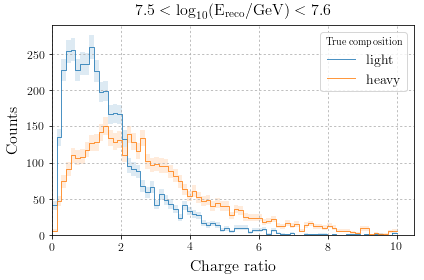

In [32]:
radius_bins = np.linspace(0, 10, 75)

fig, ax = plt.subplots()

ratio = df_sim.InIce_charge_1_60/df_sim.IceTop_charge

light_counts = np.histogram(ratio[light_mask & energy_mask], radius_bins)[0]
heavy_counts = np.histogram(ratio[heavy_mask & energy_mask], radius_bins)[0]

plotting.plot_steps(radius_bins, light_counts, yerr=np.sqrt(light_counts), ax=ax, color='C0', label='light')
plotting.plot_steps(radius_bins, heavy_counts, yerr=np.sqrt(heavy_counts), ax=ax, color='C1', label='heavy')

# ax.set_yscale("log", nonposy='clip')
ax.set_ylabel('Counts')
ax.set_xlabel('Charge ratio')
ax.set_title('$\mathrm{ 7.5 < \\log_{10}(E_{reco}/GeV) < 7.6 }$')
ax.set_xlim(0)
ax.set_ylim(0)
ax.grid()
ax.legend(title='True composition')
# plt.savefig('/home/jbourbeau/public_html/figures/avg-radius-dist-example.png')
plt.show()

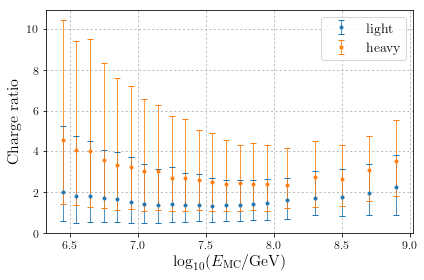

In [34]:
energybins = comp.analysis.get_energybins()
fig, ax = plt.subplots()
ratio = df_sim.InIce_charge_1_60/df_sim.IceTop_charge
light_mask = df_sim['MC_comp_class'] == 'light'
bin_centers, bin_medians_light, error_light = comp.analysis.get_medians(df_sim[light_mask].MC_log_energy.values,
                                                            ratio[light_mask].values,
                                                            energybins.log_energy_bins)
heavy_mask = df_sim['MC_comp_class'] == 'heavy'
bin_centers, bin_medians_heavy, error_heavy = comp.analysis.get_medians(df_sim[heavy_mask].MC_log_energy.values,
                                                            ratio[heavy_mask].values,
                                                            energybins.log_energy_bins)

ax.errorbar(bin_centers, bin_medians_light, yerr=error_light, label='light', ls='None', marker='.')
ax.errorbar(bin_centers, bin_medians_heavy, yerr=error_heavy, label='heavy', ls='None', marker='.')
ax.set_xlabel('$\log_{10}(E_{\mathrm{MC}}/\mathrm{GeV})$')
ax.set_ylabel('Charge ratio')
ax.grid()
ax.legend()
plt.show()